In [33]:
import pandas as pd
calendar = pd.read_csv('calendar.csv')
calendar1 = pd.read_csv('calendar1.csv')
calendar2 = pd.read_csv('calendar2.csv')
calendar3 = pd.read_csv('calendar2.csv')

In [34]:
calendar = pd.concat([calendar,calendar1,calendar2,calendar3])

D:\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [35]:
calendar = calendar.reset_index(drop=True)

In [112]:
calendar.head()

,adjusted_price,available,date,listing_id,maximum_nights,minimum_nights,price
0,"$1,104.00",f,2019-09-20,69074,365.0,3.0,1104.0
1,"$1,104.00",f,2019-09-21,69074,365.0,3.0,1104.0
2,"$1,065.00",f,2019-09-22,69074,365.0,3.0,1065.0
3,"$1,073.00",f,2019-09-23,69074,365.0,3.0,1073.0
4,"$1,300.00",f,2019-09-24,69074,365.0,3.0,1300.0


In [113]:
import datetime
import matplotlib.pyplot as plt

In [114]:
calendar['price'] = calendar['price'].astype(str)

In [59]:
calendar['price'] = calendar['price'].apply(lambda x: locale.atof(x.strip("$")))

In [63]:
pricebydate = calendar.groupby('date')['price'].mean().reset_index()

In [74]:
pricebydate['date'] = [datetime.datetime.strptime(date, '%Y-%m-%d').date() for date in pricebydate['date']]

In [76]:
pricebydate['weekday'] = pricebydate['date'].apply(lambda x: x.weekday())

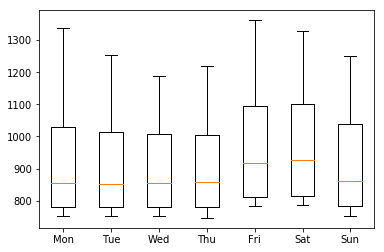

In [111]:
fig, ax = plt.subplots()
# first boxplot pair
ax.boxplot([pricebydate[pricebydate['weekday']==i]['price'] for i in range(7)])
ax.set_xticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plt.show()

In [28]:
calendar['year'] = calendar['date'].apply(lambda x: x.split('-')[0])

In [29]:
calendar2018 = calendar[calendar['year'] == '2018']

In [32]:
len(calendar2018)

201639